# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [79]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo['item_price']=chipo['item_price'].apply(lambda x: x.replace('$','').strip()).astype('float64')

### Step 4. See the first 10 entries

In [80]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 5. Create a histogram of the top 5 items bought

In [101]:
hist_df=chipo.groupby(by=['item_name']).sum().sort_values('quantity',ascending=False).drop('order_id',axis=1)
hist_df=hist_df.head().reindex()
hist_df

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43
Canned Soft Drink,351,438.75


<AxesSubplot:ylabel='quantity'>

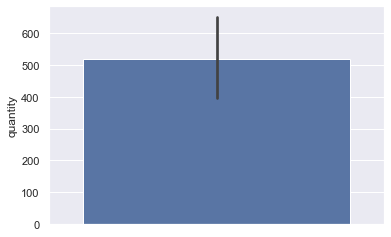

In [103]:
sns.barplot(data=hist_df,y='quantity')#, x='item_name',y='quantity')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

<AxesSubplot:xlabel='item_price', ylabel='quantity'>

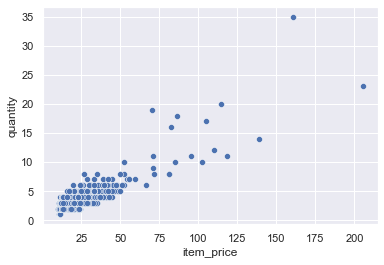

In [86]:
scatter_df=chipo.groupby('order_id').agg('sum')
sns.set_theme()
sns.scatterplot(data=scatter_df,x='item_price',y='quantity')

### Step 7. BONUS: Create a question and a graph to answer your own question.